In [1]:
from bs4 import BeautifulSoup
import requests
import html5lib
import urllib3, json
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)
import pandas as pd
import re

In [2]:
url= "https://www.cbssports.com/nfl/news/every-super-bowl-halftime-performer-in-history-usher-rihanna-eminem-prince-michael-jackson-and-more/"

In [3]:
data=requests.get(url).text

In [4]:
soup=BeautifulSoup(data, 'html5lib')

In [5]:
strong_tags = soup.find_all("strong")

year_list = []
performer_list = []

for strong_tag in strong_tags:
    year = strong_tag.get_text(strip=True)

    # Find the next sibling element after the <strong> tag
    sibling = strong_tag.next_sibling

    # Initialize a list to store performers for the current year
    performers = []

    # Loop through siblings until the next <strong> tag is encountered
    while sibling and sibling.name != "strong":
        # Check if the sibling is a string (text)
        if isinstance(sibling, str):
            # Append the text to the performers list
            performers.append(sibling.strip())
        # Move to the next sibling
        sibling = sibling.next_sibling

        # Exclude any unwanted links (e.g., "Read More")
        performers = [performer for performer in performers if not performer.startswith("Read More")]

        year_list.append(year)
        performer_list.append(", ".join(performers))

df = pd.DataFrame({"Year": year_list, "Performer(s)": performer_list})

print(df)

     Year                                       Performer(s)
0    2024                                                  :
1    2024                                                  :
2    2024  :, Alicia Keys, Jermaine Dupri, H.E.R., will.i...
3   2023:                                            Rihanna
4   2022:  Eminem, Dr. Dre. Snoop Dogg, Kendrick Lamar an...
5   2021:                                         The Weeknd
6   2020:  Shakira, Jennifer Lopez, Bad Bunny, J Balvin, ...
7   2019:                    Maroon 5, Travis Scott, Big Boi
8   2018:              Justin Timberlake, The Tennessee Kids
9   2017:                                          Lady Gaga
10  2016:                      Coldplay, Beyonce, Bruno Mars
11  2015:        Katy Perry, Lenny Kravitz and Missy Elliott
12  2014:                  Bruno Mars, Red Hot Chili Peppers
13  2013:                                            Beyonce
14  2012:                                            Madonna
15  2011:               

In [6]:
# Drop the first two rows
df = df.drop([0, 1]).reset_index(drop=True)

In [7]:
df['No of performers'] = df['Performer(s)'].str.count(',') + 1
df.head()

,Year,Performer(s),No of performers
0,2024,":, Alicia Keys, Jermaine Dupri, H.E.R., will.i...",7
1,2023:,Rihanna,1
2,2022:,"Eminem, Dr. Dre. Snoop Dogg, Kendrick Lamar an...",3
3,2021:,The Weeknd,1
4,2020:,"Shakira, Jennifer Lopez, Bad Bunny, J Balvin, ...",5


In [8]:
df.loc[0, 'Performer(s)'] = df.loc[0, 'Performer(s)'].replace(':,', '')
df['Year'] = df['Year'].astype(str).replace(':', '', regex=True)

In [9]:
df['Is female'] = pd.NA

df.loc[0, 'Is female'] = 'Yes'
df.loc[1, 'Is female'] = 'Yes'
df.loc[2, 'Is female'] = 'Yes'
df.loc[3, 'Is female'] = 'No'
df.loc[4, 'Is female'] = 'Yes'
df.loc[5, 'Is female'] = 'No'
df.loc[6, 'Is female'] = 'No'
df.loc[7, 'Is female'] = 'Yes'
df.loc[8, 'Is female'] = 'Yes'
df.loc[9, 'Is female'] = 'Yes'
df.loc[10, 'Is female'] = 'No'

df.loc[11, 'Is female'] = 'Yes'
df.loc[12, 'Is female'] = 'Yes'
df.loc[13, 'Is female'] = 'Yes'
df.loc[14, 'Is female'] = 'No'
df.loc[15, 'Is female'] = 'No'
df.loc[16, 'Is female'] = 'No'
df.loc[17, 'Is female'] = 'No'
df.loc[18, 'Is female'] = 'No'
df.loc[19, 'Is female'] = 'No'
df.loc[20, 'Is female'] = 'Yes'

df.loc[21, 'Is female'] = 'Yes'
df.loc[22, 'Is female'] = 'No'
df.loc[23, 'Is female'] = 'Yes'
df.loc[24, 'Is female'] = 'Yes'
df.loc[25, 'Is female'] = 'Yes'
df.loc[26, 'Is female'] = 'Yes'
df.loc[27, 'Is female'] = 'No'
df.loc[28, 'Is female'] = 'Yes'
df.loc[29, 'Is female'] = 'Yes'
df.loc[30, 'Is female'] = 'Yes'


df.loc[31, 'Is female'] = 'No'
df.loc[32, 'Is female'] = 'Yes'
df.loc[33, 'Is female'] = 'No'
df.loc[34, 'Is female'] = 'Yes'
df.loc[35, 'Is female'] = 'No'
df.loc[36, 'Is female'] = 'No'
df.loc[37, 'Is female'] = 'No'
df.loc[38, 'Is female'] = 'No'
df.loc[39, 'Is female'] = 'No'
df.loc[40, 'Is female'] = 'No'

df.loc[41, 'Is female'] = 'No'
df.loc[42, 'Is female'] = 'Yes'
df.loc[43, 'Is female'] = 'Yes'
df.loc[44, 'Is female'] = 'Yes'
df.loc[45, 'Is female'] = 'No'
df.loc[46, 'Is female'] = 'No'
df.loc[47, 'Is female'] = 'No'
df.loc[48, 'Is female'] = 'Yes'
df.loc[49, 'Is female'] = 'No'
df.loc[50, 'Is female'] = 'No'

df.loc[51, 'Is female'] = 'No'
df.loc[52, 'Is female'] = 'Yes'
df.loc[53, 'Is female'] = 'No'
df.loc[54, 'Is female'] = 'Yes'
df.loc[55, 'Is female'] = 'No'
df.loc[56, 'Is female'] = 'No'
df.loc[57, 'Is female'] = 'No'

df.head()

,Year,Performer(s),No of performers,Is female
0,2024,"Alicia Keys, Jermaine Dupri, H.E.R., will.i.a...",7,Yes
1,2023,Rihanna,1,Yes
2,2022,"Eminem, Dr. Dre. Snoop Dogg, Kendrick Lamar an...",3,Yes
3,2021,The Weeknd,1,No
4,2020,"Shakira, Jennifer Lopez, Bad Bunny, J Balvin, ...",5,Yes


In [10]:
import os

# Print the current working directory
print("Current working directory:", os.getcwd())

cwd = os.getcwd()  # Get the current working directory (cwd)
files = os.listdir(cwd)  # Get all the files in that directory
print("Files in %r: %s" % (cwd, files))

Current working directory: /drive
Files in '/drive': ['Superbowl.ipynb', 'Superbowl_Clean.ipynb', 'super-bowl-ratings (1).csv', 'README.md', 'data', 'notebooks']


In [10]:
ratings = pd.read_csv('super-bowl-ratings (1).csv')
ratings_df = ratings[['date','total_viewers', 'household_rating']]
print(ratings_df)

          date  total_viewers  household_rating
0   1967-01-15     35600000.0              18.5
1   1968-01-14     51300000.0              36.8
2   1969-01-12     54500000.0              36.0
3   1970-01-11     59200000.0              39.4
4   1971-01-17     58500000.0              39.9
5   1972-01-16     67300000.0              44.2
6   1973-01-14     67700000.0              42.7
7   1974-01-13     63200000.0              41.6
8   1975-01-12     71300000.0              42.4
9   1976-01-18     73300000.0              42.3
10  1977-01-09     81900000.0              44.4
11  1978-01-15    102010000.0              47.2
12  1979-01-21     96630000.0              47.1
13  1980-01-20     97800000.0              46.3
14  1981-01-25     94120000.0              44.4
15  1982-01-24    110230000.0              49.1
16  1983-01-30    109040000.0              48.6
17  1984-01-22    105200000.0              46.4
18  1985-01-20    115940000.0              46.4
19  1986-01-26    127060000.0           

In [11]:
ratings_df=ratings_df.sort_values(by=ratings_df.columns[0], ascending=False).reset_index(drop=True)
ratings_df.tail(10)

,date,total_viewers,household_rating
45,1976-01-18,73300000.0,42.3
46,1975-01-12,71300000.0,42.4
47,1974-01-13,63200000.0,41.6
48,1973-01-14,67700000.0,42.7
49,1972-01-16,67300000.0,44.2
50,1971-01-17,58500000.0,39.9
51,1970-01-11,59200000.0,39.4
52,1969-01-12,54500000.0,36.0
53,1968-01-14,51300000.0,36.8
54,1967-01-15,35600000.0,18.5


In [12]:
ratings_df.loc[0, 'total_viewers'] = 95877000
ratings_df.loc[3, 'total_viewers'] = 104016000
ratings_df.loc[7, 'total_viewers'] = 112752000

In [13]:
print(ratings_df.dtypes)

date                 object
total_viewers       float64
household_rating    float64
dtype: object


In [14]:
ratings_df['total_viewers'] = ratings_df['total_viewers'].astype(float)

ratings_df['total_viewers'] = ratings_df['total_viewers'].astype(int).apply(lambda x: '{:,}'.format(x))

In [15]:
ratings_df.head()

,date,total_viewers,household_rating
0,2021-02-07,"95,877,000",38.2
1,2020-02-02,"148,500,000",41.6
2,2019-02-03,"149,000,000",41.1
3,2018-02-04,"104,016,000",43.1
4,2017-02-05,"172,000,000",45.3


In [16]:
new_rows_data = [
    {'date': 2024, 'total_viewers': '123,714,000', 'household_rating': 43.5},
    {'date': 2023, 'total_viewers': '115,096,000', 'household_rating': 40.7},
    {'date': 2022, 'total_viewers': '101,470,000', 'household_rating': 37.9},
]
new_rows_df = pd.DataFrame(new_rows_data)

ratings_df = pd.concat([new_rows_df, ratings_df], ignore_index=True)
ratings_df.head()

,date,total_viewers,household_rating
0,2024,"123,714,000",43.5
1,2023,"115,096,000",40.7
2,2022,"101,470,000",37.9
3,2021-02-07,"95,877,000",38.2
4,2020-02-02,"148,500,000",41.6


In [17]:
ratings_df['date'] = pd.to_datetime(ratings_df['date'])
ratings_df['date'] = ratings_df['date'].dt.year
ratings_df = ratings_df.rename(columns={'date': 'Year','total_viewers': 'Total Viewers', 'household_rating': 'Household Rating'})

ratings_df.head()

,Year,Total Viewers,Household Rating
0,1970,"123,714,000",43.5
1,1970,"115,096,000",40.7
2,1970,"101,470,000",37.9
3,2021,"95,877,000",38.2
4,2020,"148,500,000",41.6


In [18]:
ratings_df.loc[0:2, 'Year'] = [2024, 2023, 2022]
ratings_df.head()

,Year,Total Viewers,Household Rating
0,2024,"123,714,000",43.5
1,2023,"115,096,000",40.7
2,2022,"101,470,000",37.9
3,2021,"95,877,000",38.2
4,2020,"148,500,000",41.6


In [19]:
ratings_df=ratings_df.drop(ratings_df.columns[0], axis=1)
ratings_df.head()

,Total Viewers,Household Rating
0,"123,714,000",43.5
1,"115,096,000",40.7
2,"101,470,000",37.9
3,"95,877,000",38.2
4,"148,500,000",41.6


In [20]:
final_df = pd.concat([df.reset_index(drop=True), ratings_df.reset_index(drop=True)], axis=1)

In [21]:
final_df.head()

,Year,Performer(s),No of performers,Is female,Total Viewers,Household Rating
0,2024,"Alicia Keys, Jermaine Dupri, H.E.R., will.i.a...",7,Yes,"123,714,000",43.5
1,2023,Rihanna,1,Yes,"115,096,000",40.7
2,2022,"Eminem, Dr. Dre. Snoop Dogg, Kendrick Lamar an...",3,Yes,"101,470,000",37.9
3,2021,The Weeknd,1,No,"95,877,000",38.2
4,2020,"Shakira, Jennifer Lopez, Bad Bunny, J Balvin, ...",5,Yes,"148,500,000",41.6


In [22]:
final_df.sort_values(by='Year', ascending=False, inplace=True)
final_df.tail(10)

,Year,Performer(s),No of performers,Is female,Total Viewers,Household Rating
48,1976,"""200 Years and Just a Baby"" Tribute to America...",1,Yes,"73,300,000",42.3
49,1975,"""Tribute to Duke Ellington"" with Mercer Elling...",1,No,"71,300,000",42.4
50,1974,"""A Musical America"" with University of Texas band",1,No,"63,200,000",41.6
51,1973,"""Happiness Is."" with University of Michigan ma...",1,No,"67,700,000",42.7
52,1972,"""Salute to Louis Armstrong"" with Ella Fitzgera...",3,Yes,"67,300,000",44.2
53,1971,Florida A&M band,1,No,"58,500,000",39.9
54,1970,Carol Channing,1,Yes,"59,200,000",39.4
55,1969,"""America Thanks"" with Florida A&M University band",1,No,"54,500,000",36.0
56,1968,Grambling State band,1,No,"51,300,000",36.8
57,1967,University of Arizona and Grambling State marc...,1,No,"35,600,000",18.5


In [23]:
final_df.dtypes

Year                 object
Performer(s)         object
No of performers      int64
Is female            object
Total Viewers        object
Household Rating    float64
dtype: object

In [24]:
final_df['Year'] = final_df['Year'].astype(int)

In [25]:
final_df = final_df.sort_values(by='Year', ascending=False)
final_df = final_df[::-1]
final_df.tail()

,Year,Performer(s),No of performers,Is female,Total Viewers,Household Rating
4,2020,"Shakira, Jennifer Lopez, Bad Bunny, J Balvin, ...",5,Yes,"148,500,000",41.6
3,2021,The Weeknd,1,No,"95,877,000",38.2
2,2022,"Eminem, Dr. Dre. Snoop Dogg, Kendrick Lamar an...",3,Yes,"101,470,000",37.9
1,2023,Rihanna,1,Yes,"115,096,000",40.7
0,2024,"Alicia Keys, Jermaine Dupri, H.E.R., will.i.a...",7,Yes,"123,714,000",43.5


In [26]:
final_df.reset_index(drop=True, inplace=True)
final_df.tail()

,Year,Performer(s),No of performers,Is female,Total Viewers,Household Rating
53,2020,"Shakira, Jennifer Lopez, Bad Bunny, J Balvin, ...",5,Yes,"148,500,000",41.6
54,2021,The Weeknd,1,No,"95,877,000",38.2
55,2022,"Eminem, Dr. Dre. Snoop Dogg, Kendrick Lamar an...",3,Yes,"101,470,000",37.9
56,2023,Rihanna,1,Yes,"115,096,000",40.7
57,2024,"Alicia Keys, Jermaine Dupri, H.E.R., will.i.a...",7,Yes,"123,714,000",43.5


In [27]:
final_df.dtypes

Year                  int32
Performer(s)         object
No of performers      int64
Is female            object
Total Viewers        object
Household Rating    float64
dtype: object

In [28]:
%pip install seaborn

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

<ipython-input-30-9727d90bf6d2>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  count_graph=sns.countplot(x='Is female', data=final_df, palette=['pink', 'blue'])


Text(0.5, 1.0, 'Female vs Male Performers')

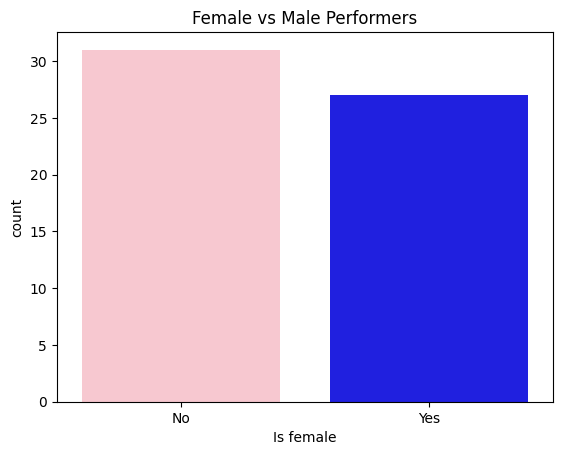

In [30]:
count_graph=sns.countplot(x='Is female', data=final_df, palette=['pink', 'blue'])
count_graph.set_title('Female vs Male Performers')

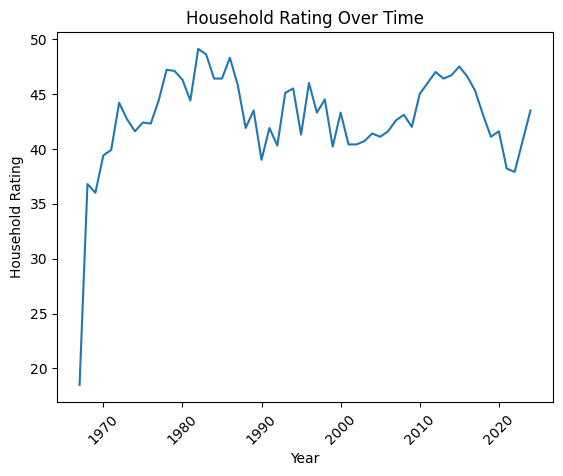

In [31]:
sns.lineplot(x='Year', y='Household Rating', data=final_df)

plt.title('Household Rating Over Time')
plt.xlabel('Year')
plt.ylabel('Household Rating')

plt.xticks(rotation=45)

plt.show()

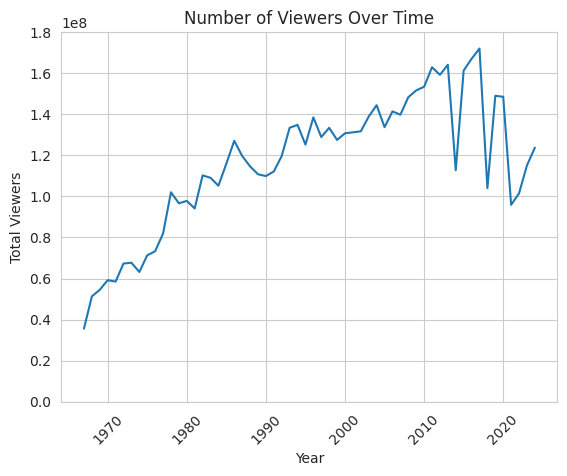

In [32]:
sns.set_style("whitegrid")
final_df['Total Viewers'] = final_df['Total Viewers'].str.replace(',', '').astype(int)
sns.lineplot(x='Year', y='Total Viewers', data=final_df)

plt.yticks(range(0, int(final_df['Total Viewers'].max()) + 20000000, 20000000))
plt.title('Number of Viewers Over Time')
plt.xlabel('Year')
plt.ylabel('Total Viewers')

plt.xticks(rotation=45)

plt.show()

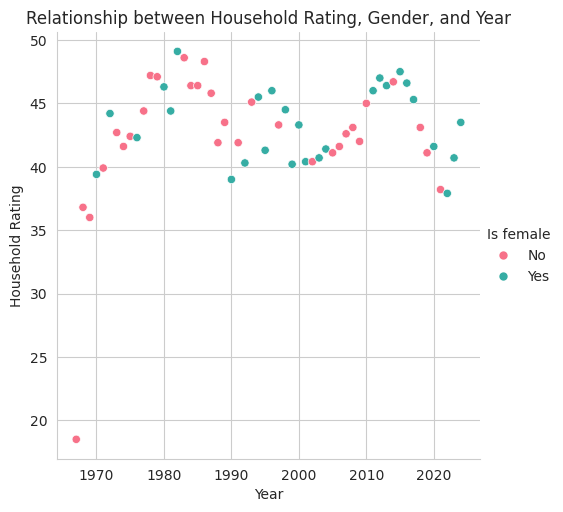

In [33]:
sns.set_style("whitegrid")

sns.relplot(data=final_df, x='Year', y='Household Rating', hue='Is female', kind='scatter', palette='husl')
plt.title('Relationship between Household Rating, Gender, and Year')
plt.show()

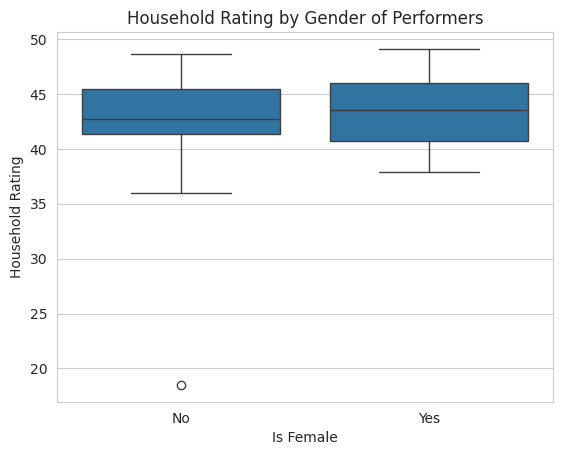

In [34]:
sns.set_style("whitegrid")

sns.boxplot(x='Is female', y='Household Rating', data=final_df)
plt.title('Household Rating by Gender of Performers')
plt.xlabel('Is Female')
plt.ylabel('Household Rating')

plt.show()

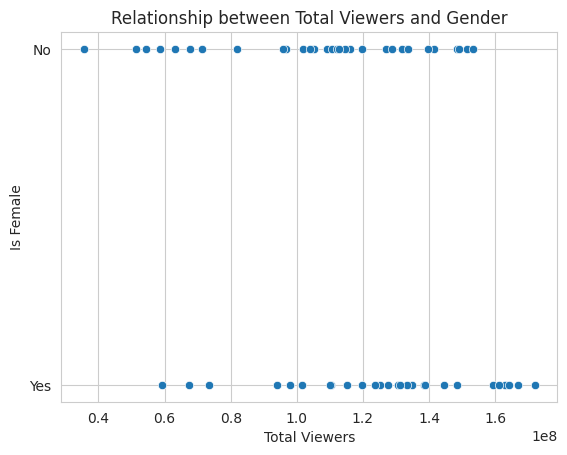

In [35]:
sns.scatterplot(x='Total Viewers', y='Is female', data=final_df)

plt.title('Relationship between Total Viewers and Gender')
plt.xlabel('Total Viewers')
plt.ylabel('Is Female')

plt.show()

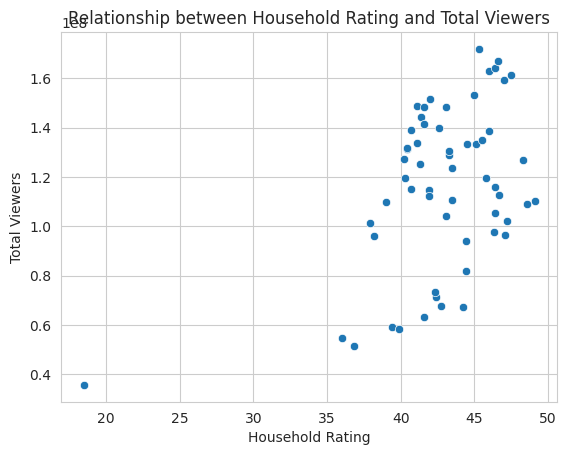

In [36]:
sns.scatterplot(x='Household Rating', y='Total Viewers', data=final_df)

plt.title('Relationship between Household Rating and Total Viewers')
plt.xlabel('Household Rating')
plt.ylabel('Total Viewers')

plt.show()

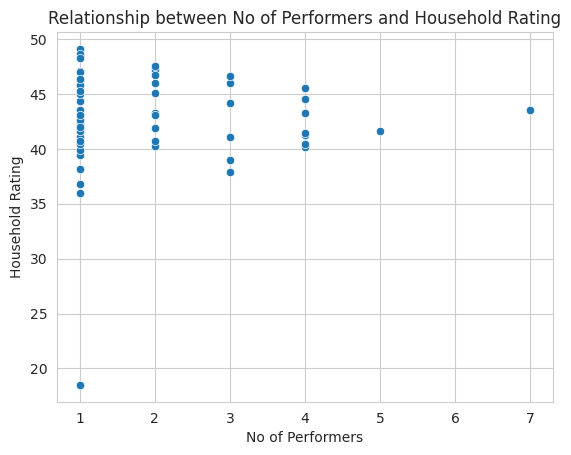

In [37]:
sns.scatterplot(x='No of performers', y='Household Rating', data=final_df)

plt.title('Relationship between No of Performers and Household Rating')
plt.xlabel('No of Performers')
plt.ylabel('Household Rating')

plt.show()

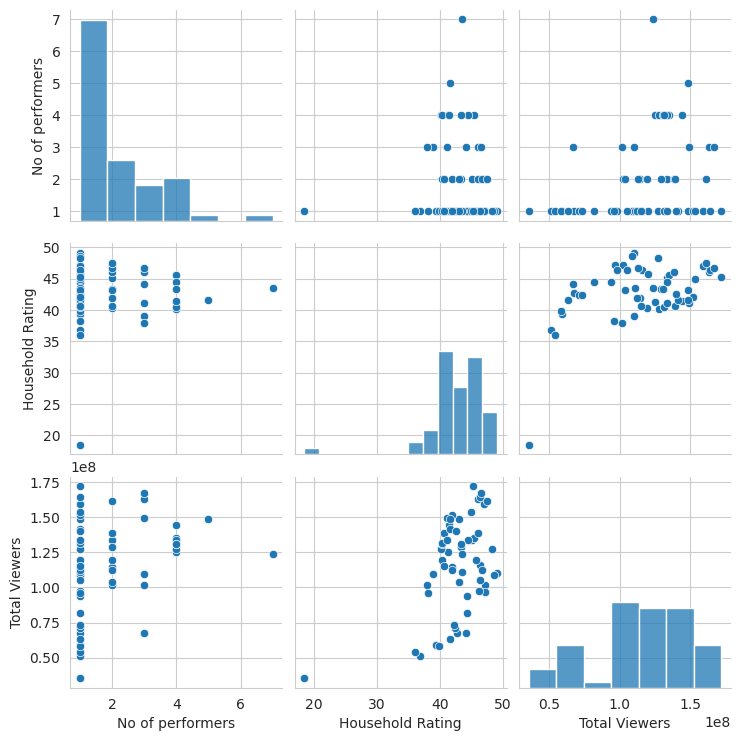

In [38]:
columns_of_interest = ['No of performers', 'Household Rating', 'Total Viewers']

sns.pairplot(final_df[columns_of_interest])

plt.show()

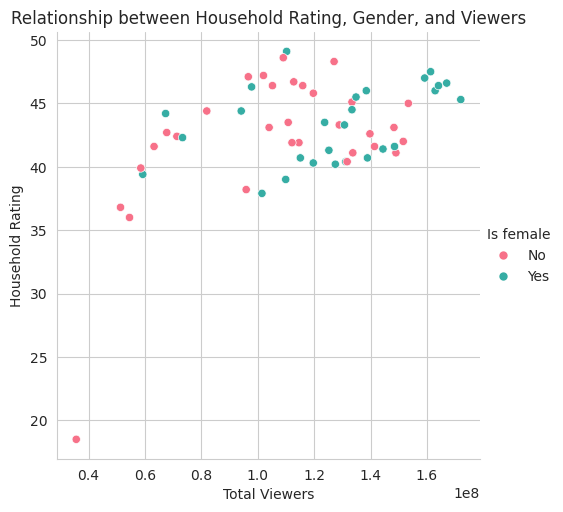

In [39]:
sns.set_style("whitegrid")

sns.relplot(data=final_df, x='Total Viewers', y='Household Rating', hue='Is female', kind='scatter', palette='husl')
plt.title('Relationship between Household Rating, Gender, and Viewers')
plt.show()

In [40]:
type_df = final_df.copy()

type_df['Type'] = 'Super Bowl'

print(type_df.head())

   Year                                       Performer(s)  No of performers  \
0  1967  University of Arizona and Grambling State marc...                 1   
1  1968                               Grambling State band                 1   
2  1969  "America Thanks" with Florida A&M University band                 1   
3  1970                                     Carol Channing                 1   
4  1971                                   Florida A&M band                 1   

  Is female  Total Viewers  Household Rating        Type  
0        No       35600000              18.5  Super Bowl  
1        No       51300000              36.8  Super Bowl  
2        No       54500000              36.0  Super Bowl  
3       Yes       59200000              39.4  Super Bowl  
4        No       58500000              39.9  Super Bowl  


In [41]:
type_df.loc[0, 'Type'] = 'Group' 
type_df.loc[1, 'Type'] = 'Group'
type_df.loc[2, 'Type'] = 'Group'
type_df.loc[3, 'Type'] = 'Female'
type_df.loc[4, 'Type'] = 'Group'
type_df.loc[5, 'Type'] = 'Female'
type_df.loc[6, 'Type'] = 'Group'
type_df.loc[7, 'Type'] = 'Group'
type_df.loc[8, 'Type'] = 'Group'
type_df.loc[9, 'Type'] = 'Group'
type_df.loc[10, 'Type'] = 'Group'

type_df.loc[11, 'Type'] = 'Male'
type_df.loc[12, 'Type'] = 'Group'
type_df.loc[13, 'Type'] = 'Group'
type_df.loc[14, 'Type'] = 'Female'
type_df.loc[15, 'Type'] = 'Group'
type_df.loc[16, 'Type'] = 'Group'
type_df.loc[17, 'Type'] = 'Group'
type_df.loc[18, 'Type'] = 'Group'
type_df.loc[19, 'Type'] = 'Group'
type_df.loc[20, 'Type'] = 'Group'

type_df.loc[21, 'Type'] = 'Group'
type_df.loc[22, 'Type'] = 'Male'
type_df.loc[23, 'Type'] = 'Group'
type_df.loc[24, 'Type'] = 'Male'
type_df.loc[25, 'Type'] = 'Female'
type_df.loc[26, 'Type'] = 'Male'
type_df.loc[27, 'Type'] = 'Female'
type_df.loc[28, 'Type'] = 'Female'
type_df.loc[29, 'Type'] = 'Female'
type_df.loc[30, 'Type'] = 'Male'


type_df.loc[31, 'Type'] = 'Female' 
type_df.loc[32, 'Type'] = 'Female'
type_df.loc[33, 'Type'] = 'Female'
type_df.loc[34, 'Type'] = 'Female'
type_df.loc[35, 'Type'] = 'Male'
type_df.loc[36, 'Type'] = 'Female'
type_df.loc[37, 'Type'] = 'Female'
type_df.loc[38, 'Type'] = 'Male'
type_df.loc[39, 'Type'] = 'Male'
type_df.loc[40, 'Type'] = 'Male'

type_df.loc[41, 'Type'] = 'Male'
type_df.loc[42, 'Type'] = 'Male'
type_df.loc[43, 'Type'] = 'Male'
type_df.loc[44, 'Type'] = 'Female'
type_df.loc[45, 'Type'] = 'Female'
type_df.loc[46, 'Type'] = 'Female'
type_df.loc[47, 'Type'] = 'Male'
type_df.loc[48, 'Type'] = 'Female'
type_df.loc[49, 'Type'] = 'Female'
type_df.loc[50, 'Type'] = 'Female'

type_df.loc[51, 'Type'] = 'Male'
type_df.loc[52, 'Type'] = 'Male'
type_df.loc[53, 'Type'] = 'Female'
type_df.loc[54, 'Type'] = 'Male'
type_df.loc[55, 'Type'] = 'Female'
type_df.loc[56, 'Type'] = 'Female'
type_df.loc[57, 'Type'] = 'Male'

In [42]:
type_df=type_df.drop('Is female', axis=1)
type_df.head()

,Year,Performer(s),No of performers,Total Viewers,Household Rating,Type
0,1967,University of Arizona and Grambling State marc...,1,35600000,18.5,Group
1,1968,Grambling State band,1,51300000,36.8,Group
2,1969,"""America Thanks"" with Florida A&M University band",1,54500000,36.0,Group
3,1970,Carol Channing,1,59200000,39.4,Female
4,1971,Florida A&M band,1,58500000,39.9,Group


<ipython-input-43-08f060391114>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  count_graph=sns.countplot(x='Type', data=type_df, palette=['pink', 'blue', 'orange'])


Text(0.5, 1.0, 'Types of Performers')

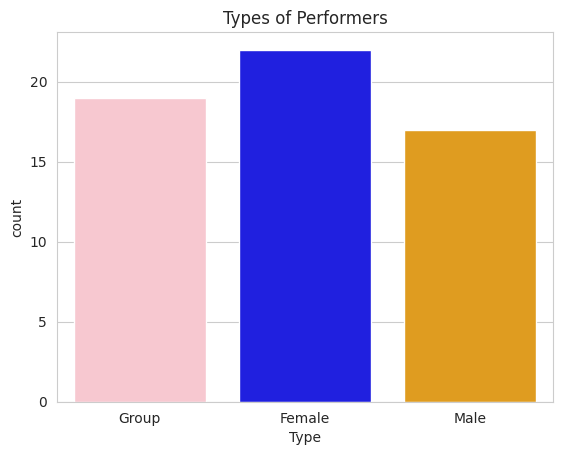

In [43]:
count_graph=sns.countplot(x='Type', data=type_df, palette=['pink', 'blue', 'orange'])
count_graph.set_title('Types of Performers')

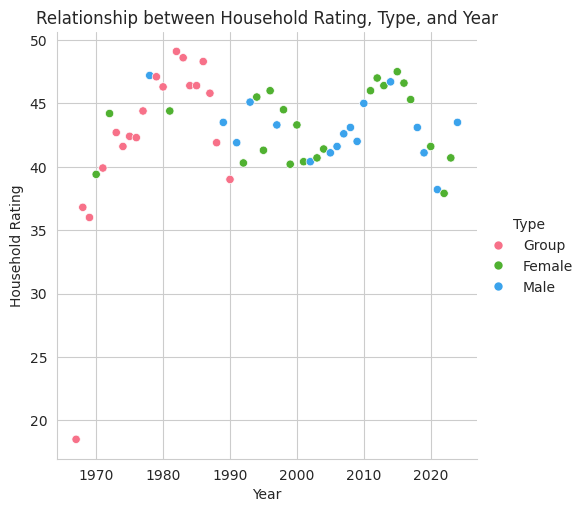

In [44]:
sns.set_style("whitegrid")

sns.relplot(data=type_df, x='Year', y='Household Rating', hue='Type', kind='scatter', palette='husl')
plt.title('Relationship between Household Rating, Type, and Year')
plt.show()

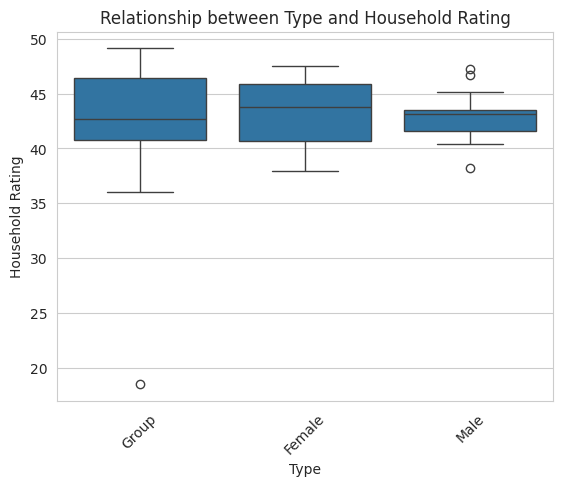

In [45]:
sns.boxplot(x='Type', y='Household Rating', data=type_df)

plt.title('Relationship between Type and Household Rating')
plt.xlabel('Type')
plt.ylabel('Household Rating')
plt.xticks(rotation=45)
plt.show()

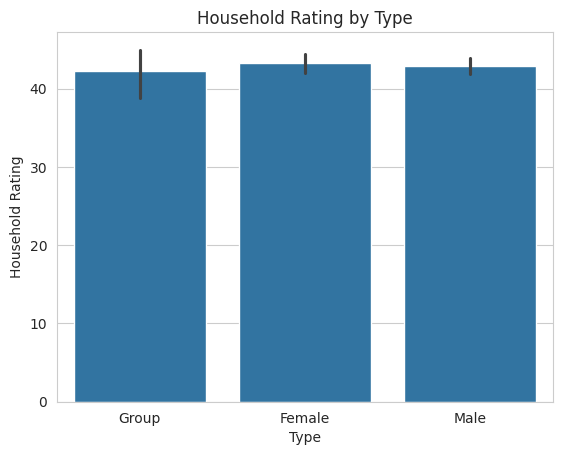

In [46]:
sns.barplot(x='Type', y='Household Rating', data=type_df)

plt.title('Household Rating by Type')
plt.xlabel('Type')
plt.ylabel('Household Rating')
plt.show()

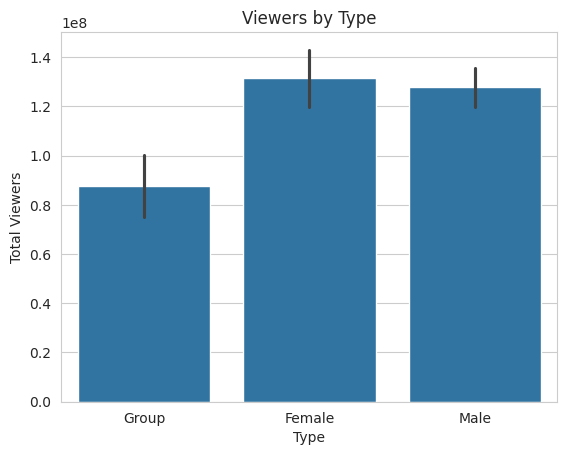

In [47]:
sns.barplot(x='Type', y='Total Viewers', data=type_df)

plt.title('Viewers by Type')
plt.xlabel('Type')
plt.ylabel('Total Viewers')
plt.show()

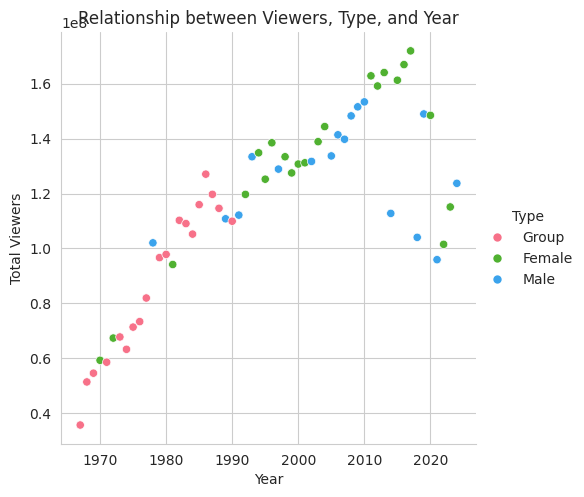

In [48]:
sns.set_style("whitegrid")

sns.relplot(data=type_df, x='Year', y='Total Viewers', hue='Type', kind='scatter', palette='husl')
plt.title('Relationship between Viewers, Type, and Year')
plt.show()

In [54]:
import sys
sys.version_info

sys.version_info(major=3, minor=11, micro=3, releaselevel='final', serial=0)

In [55]:
import sys
print(sys.version)

3.11.3 (main, Jan 18 2024, 19:07:12) [Clang 18.0.0 (https://github.com/llvm/llvm-project 75501f53624de92aafce2f1da698


In [60]:
%pip install --upgrade 'nbconvert>=7' 'mistune>=2'

usage: piplite [-h] [--verbose] [--quiet] [--requirements [REQUIREMENTS ...]]
               [--no-deps] [--pre]
               {help,install} [packages ...]
piplite: error: unrecognized arguments: --upgrade nbconvert>=7 mistune>=2
